<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
`GITHUB` Version: &#x1F4D8; &nbsp;  [kaggle_passnyc5.ipynb](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/kaggle_passnyc5.ipynb)

The previous notebooks:

&#x1F4D8; &nbsp; [PASSNYC. Data Exploration](https://www.kaggle.com/olgabelitskaya/passnyc-data-exploration)

&#x1F4D8; &nbsp; [PASSNYC. Numeric and Categorical Variables](https://www.kaggle.com/olgabelitskaya/passnyc-numeric-and-categorical-variables)

&#x1F4D8; &nbsp; [PASSNYC. Comparing All Districts with 5th District](passnyc-comparing-all-districts-with-5th-district)

&#x1F4D8; &nbsp; [PASSNYC. Regression Methods](https://www.kaggle.com/olgabelitskaya/passnyc-regression-methods)

Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) & &#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np,pandas as pd
import pylab as plt,seaborn as sns
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import explained_variance_score
from keras.models import Sequential,Model
from keras.optimizers import SGD,RMSprop
from keras.layers import Dense,Dropout,LSTM
from keras.layers import Activation,Flatten,Input,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
cmap=plt.cm.get_cmap('Spectral',4)
spectral_cmap=[]
for i in range(cmap.N):
    rgb=cmap(i)[:3]
    spectral_cmap.append(mcolors.rgb2hex(rgb))
plt.style.use('seaborn-whitegrid'); path='../input/'
fw='weights.passnyc.hdf5'

Using TensorFlow backend.


In [3]:
def scores(regressor,y_train,y_valid,y_test,
           y_train_reg,y_valid_reg,y_test_reg):
    print(20*"<=>"); print(regressor); print(20*"<=>")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Valid: ",
          explained_variance_score(y_valid,y_valid_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"<=>")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Valid: ",r2_score(y_valid,y_valid_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"<=>")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Valid: ",
          mean_squared_error(y_valid,y_valid_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Valid: ",
          mean_absolute_error(y_valid,y_valid_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Valid: ",
          median_absolute_error(y_valid,y_valid_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    plt.figure(figsize=(11,10)); plt.subplot(211)
    plt.plot(fit_history.history[keys[0]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[2]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend(); plt.title('Loss Function')    
    plt.subplot(212)
    plt.plot(fit_history.history[keys[1]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[3]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("MAE"); plt.legend()
    plt.title('Mean Absolute Error'); plt.show() 

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing</h1>

In [4]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
school_explorer.shape,d5_shsat.shape

((1272, 161), (140, 7))

In [5]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']               
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]    
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                            ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)    
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum())) 

Number of Missing Values:  0


In [6]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+numeric_list+\
                         category_list+target_list],
         d5_shsat_2016,on='Location Code')
d5_shsat_2016.shape

(21, 155)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>  &#x1F310; &nbsp; Data Splitting for Neural Networks</h1>
The predictions of economic indicators for schools are based on the data about social environment, ethnic composition and educational results.
### The first set of features and targets

In [7]:
features1=school_explorer[numeric_list+target_list]\
.drop(economic_list,axis=1).values
targets1=school_explorer['Economic Need Index'].values
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features1,targets1,test_size=.2,random_state=1)
n=int(len(X_test1)/2)
X_valid1,y_valid1=X_test1[:n],y_test1[:n]
X_test1,y_test1=X_test1[n:],y_test1[n:]
# data = school_explorer
# features = numeric variables + target_list - economic_list
# targets = Economic Need Index
[X_train1.shape,X_test1.shape,X_valid1.shape,
y_train1.shape,y_test1.shape,y_valid1.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

### The second set of features and targets

In [8]:
features2=school_explorer[numeric_list+target_list]\
.drop(economic_list, axis=1).values
targets2=school_explorer['School Income Estimate'].values
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features2,targets2,test_size=.2,random_state=1)
n=int(len(X_test2)/2)
X_valid2,y_valid2=X_test2[:n],y_test2[:n]
X_test2,y_test2=X_test2[n:],y_test2[n:]
scale_y2=RobustScaler()
y_train2=scale_y2.fit_transform(y_train2.reshape(-1,1))
y_valid2=scale_y2.transform(y_valid2.reshape(-1,1))
y_test2=scale_y2.transform(y_test2.reshape(-1,1))
# data = school_explorer
# features = numeric variables + target_list - economic_list 
# targets = School Income Estimate
[X_train2.shape,X_test2.shape,X_valid2.shape,
y_train2.shape,y_test2.shape,y_valid2.shape]

[(1017, 138), (128, 138), (127, 138), (1017, 1), (128, 1), (127, 1)]

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Neural Network Regressors</h1>
### MLP => The first set of features and targets

In [9]:
def mlp_model1():
    model=Sequential()    
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138))
    model.add(LeakyReLU(alpha=.02))   
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model1=mlp_model1()

In [10]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model1.fit(X_train1,y_train1,
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid1,y_valid1),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 9s - loss: 7356.0200 - mean_absolute_error: 13.8309 - val_loss: 2.1984 - val_mean_absolute_error: 0.9569

Epoch 00001: val_loss improved from inf to 2.19841, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 0s - loss: 4.8152 - mean_absolute_error: 1.0586 - val_loss: 0.2168 - val_mean_absolute_error: 0.2539

Epoch 00002: val_loss improved from 2.19841 to 0.21684, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 0s - loss: 0.8734 - mean_absolute_error: 0.6220 - val_loss: 0.0565 - val_mean_absolute_error: 0.2004

Epoch 00003: val_loss improved from 0.21684 to 0.05655, saving model to weights.passnyc.hdf5
Epoch 4/100
 - 0s - loss: 0.3761 - mean_absolute_error: 0.3737 - val_loss: 0.0487 - val_mean_absolute_error: 0.1893

Epoch 00004: val_loss improved from 0.05655 to 0.04870, saving model to weights.passnyc.hdf5
Epoch 5/100
 - 0s - loss: 0.1124 - mean_absolute_error: 0.2383 - val_loss: 0.0522 - val_mean_absolute_error: 0.19

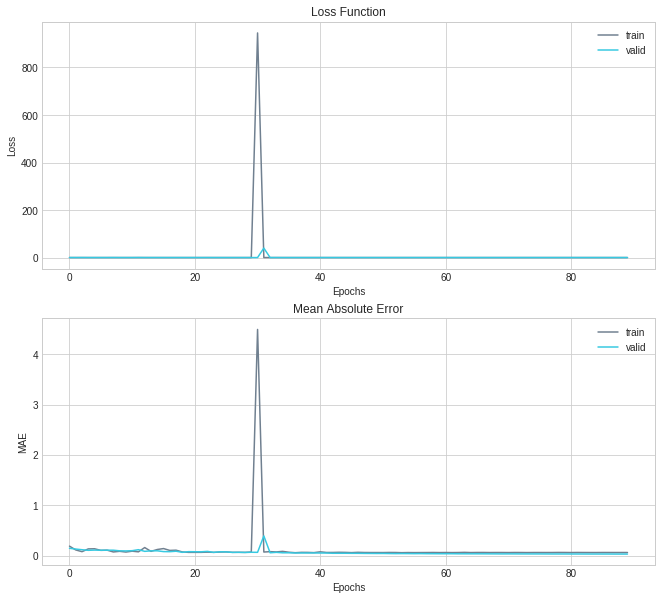

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9199704807872928
EV score. Valid:  0.8872061635060234
EV score. Test:  0.8733104171260865
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9198264935400184
R2 score. Valid:  0.8865244776624388
R2 score. Test:  0.8713742620344036
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.003385050024340318
MSE score. Valid:  0.0055087791192960514
MSE score. Test:  0.006708800821883835
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.04409116338077665
MAE score. Valid:  0.05688282350057691
MAE score. Test:  0.05948366689914838
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.03525344467163083
MdAE score. Valid:  0.04359237194061283
MdAE score. Test:  0.040742465019226015


In [11]:
history_plot(history,10)
mlp_model1.load_weights(fw)
y_train_mlp1=mlp_model1.predict(X_train1)
y_valid_mlp1=mlp_model1.predict(X_valid1)
y_test_mlp1=mlp_model1.predict(X_test1)
scores('MLP; Economic Need Index',y_train1,y_valid1,y_test1,
       y_train_mlp1,y_valid_mlp1,y_test_mlp1)

### MLP => The second set of features and targets

In [12]:
def mlp_model2():
    model=Sequential()    
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))   
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model2=mlp_model2()

In [13]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model2.fit(X_train2,y_train2, 
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid2,y_valid2),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 1s - loss: 9384.2860 - mean_absolute_error: 20.0234 - val_loss: 3.0376 - val_mean_absolute_error: 1.2737

Epoch 00001: val_loss improved from inf to 3.03764, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 0s - loss: 15.7777 - mean_absolute_error: 2.2664 - val_loss: 2.2386 - val_mean_absolute_error: 1.0913

Epoch 00002: val_loss improved from 3.03764 to 2.23860, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 0s - loss: 1.4253 - mean_absolute_error: 0.8485 - val_loss: 0.6484 - val_mean_absolute_error: 0.5503

Epoch 00003: val_loss improved from 2.23860 to 0.64837, saving model to weights.passnyc.hdf5
Epoch 4/100
 - 0s - loss: 1.3101 - mean_absolute_error: 0.7114 - val_loss: 0.4156 - val_mean_absolute_error: 0.5409

Epoch 00004: val_loss improved from 0.64837 to 0.41559, saving model to weights.passnyc.hdf5
Epoch 5/100
 - 0s - loss: 0.9506 - mean_absolute_error: 0.6258 - val_loss: 0.3383 - val_mean_absolute_error: 0.4

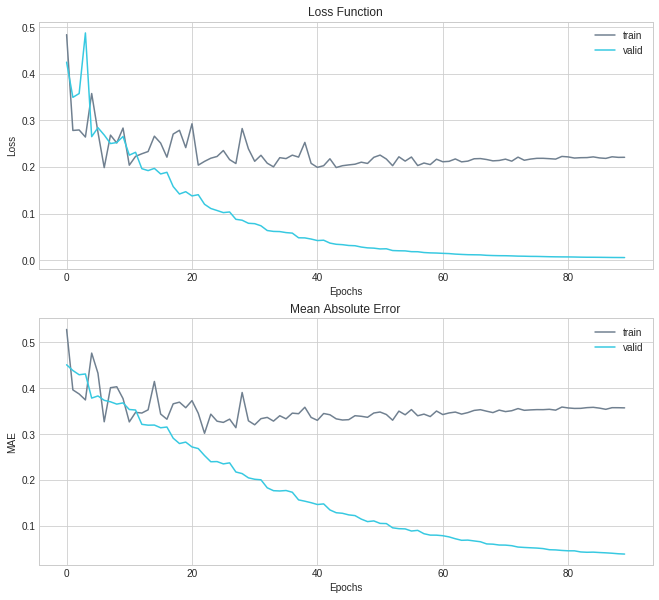

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.7348365563841162
EV score. Valid:  0.6970047693223909
EV score. Test:  0.6504166244404845
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.7329844149415325
R2 score. Valid:  0.6963576824580929
R2 score. Test:  0.6462246454983169
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.19327348588676596
MSE score. Valid:  0.19866802848062173
MSE score. Test:  0.39581082950410007
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.32264951448958784
MAE score. Valid:  0.32701904023906575
MAE score. Test:  0.39828479434815695
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.2533658719447974
MdAE score. Valid:  0.2544521162116255
MdAE score. Test:  0.28119861638960286


In [14]:
history_plot(history,10)
mlp_model2.load_weights(fw)
y_train_mlp2=mlp_model2.predict(X_train2)
y_valid_mlp2=mlp_model2.predict(X_valid2)
y_test_mlp2=mlp_model2.predict(X_test2)
scores('MLP; School Income Estimate',y_train2,y_valid2,y_test2,
       y_train_mlp2,y_valid_mlp2,y_test_mlp2)

### CNN => The first set of features and targets

In [15]:
def cnn_model1():
    model=Sequential()        
    model.add(Conv1D(138,3,padding='valid',
                     input_shape=(138,1)))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))
    model.add(Conv1D(138*4,3,padding='valid'))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))    
    model.add(Flatten())
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))
    model.add(Dense(1, kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
cnn_model1=cnn_model1()

In [16]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=cnn_model1.fit(X_train1.reshape(-1,138,1),y_train1, 
                              epochs=100,batch_size=16,verbose=2,
                              validation_data=(X_valid1.reshape(-1,138,1),y_valid1),
                              callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 5s - loss: 9383.3922 - mean_absolute_error: 22.5247 - val_loss: 107.9983 - val_mean_absolute_error: 7.8077

Epoch 00001: val_loss improved from inf to 107.99833, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 1s - loss: 65.0752 - mean_absolute_error: 4.4627 - val_loss: 0.6310 - val_mean_absolute_error: 0.5401

Epoch 00002: val_loss improved from 107.99833 to 0.63097, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 1s - loss: 34.2491 - mean_absolute_error: 2.7460 - val_loss: 2.9597 - val_mean_absolute_error: 0.6798

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 1s - loss: 10.5954 - mean_absolute_error: 1.4952 - val_loss: 1.2328 - val_mean_absolute_error: 0.5350

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 1s - loss: 6.8786 - mean_absolute_error: 1.2232 - val_loss: 0.3898 - val_mean_absolute_error: 0.5151

Epoch 00005: val_loss improved from 0.63097 to 0.38978, saving model to weights.passnyc.hdf5
Epoc

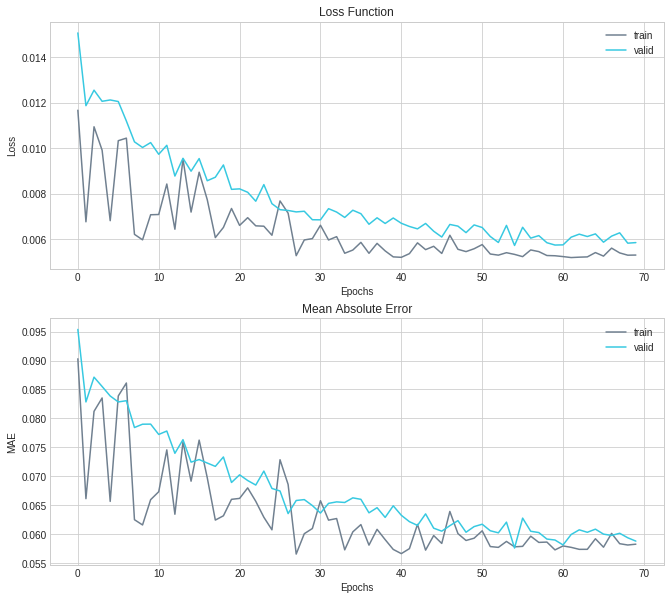

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
CNN; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9019188718669451
EV score. Valid:  0.894440829101335
EV score. Test:  0.8828850272957027
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9005621129615695
R2 score. Valid:  0.8931001144032359
R2 score. Test:  0.8801065439474659
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.004198422107280582
MSE score. Valid:  0.005189558465999365
MSE score. Test:  0.006253346563647098
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.049443629462786944
MAE score. Valid:  0.057726212827239436
MAE score. Test:  0.0608519022623077
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.04044852924346931
MdAE score. Valid:  0.052941373825073246
MdAE score. Test:  0.05058903956413269


In [17]:
history_plot(history,30)
cnn_model1.load_weights(fw)
y_train_cnn1=cnn_model1.predict(X_train1.reshape(-1,138,1))
y_valid_cnn1=cnn_model1.predict(X_valid1.reshape(-1,138,1))
y_test_cnn1=cnn_model1.predict(X_test1.reshape(-1,138,1))
scores('CNN; Economic Need Index',y_train1,y_valid1,y_test1,
       y_train_cnn1,y_valid_cnn1,y_test_cnn1)

### CNN => The second set of features and targets

In [18]:
def cnn_model2():
    model=Sequential()
    model.add(Conv1D(138,3,padding='valid',
                     input_shape=(138,1)))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))
    model.add(Conv1D(138*4,3,padding='valid'))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))   
    model.add(Flatten())
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
cnn_model2=cnn_model2()

In [19]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=cnn_model2.fit(X_train2.reshape(-1,138,1),y_train2, 
                              epochs=100,batch_size=64,verbose=2,
                              validation_data=(X_valid2.reshape(-1,138,1),y_valid2),
                              callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 1s - loss: 58599.6890 - mean_absolute_error: 78.7501 - val_loss: 237.9211 - val_mean_absolute_error: 13.2412

Epoch 00001: val_loss improved from inf to 237.92110, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 0s - loss: 150.3467 - mean_absolute_error: 7.9118 - val_loss: 99.5902 - val_mean_absolute_error: 7.9279

Epoch 00002: val_loss improved from 237.92110 to 99.59025, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 0s - loss: 110.8282 - mean_absolute_error: 6.7092 - val_loss: 25.1209 - val_mean_absolute_error: 3.3041

Epoch 00003: val_loss improved from 99.59025 to 25.12090, saving model to weights.passnyc.hdf5
Epoch 4/100
 - 0s - loss: 112.1054 - mean_absolute_error: 6.6049 - val_loss: 66.4540 - val_mean_absolute_error: 5.9650

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 0s - loss: 65.9306 - mean_absolute_error: 4.7349 - val_loss: 5.4819 - val_mean_absolute_error: 1.3504

Epoch 00005: val_loss improved

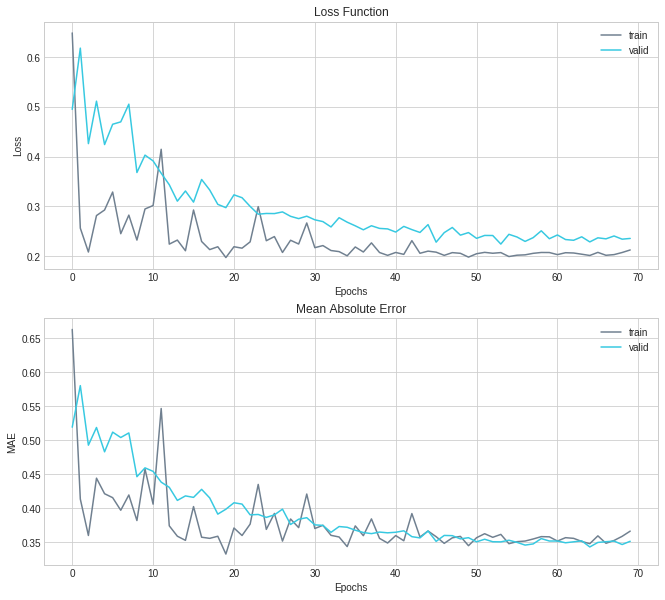

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
CNN; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.6570271514473895
EV score. Valid:  0.6992539696894214
EV score. Test:  0.6529150020811496
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.6538210042899868
R2 score. Valid:  0.6991191749637626
R2 score. Test:  0.6485168080927839
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.2505742173326834
MSE score. Valid:  0.19686123067916017
MSE score. Test:  0.3932463128798365
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.34889993111944884
MAE score. Valid:  0.33285938700548096
MAE score. Test:  0.38816523430352995
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.260317191389991
MdAE score. Valid:  0.2679641346386198
MdAE score. Test:  0.270328647060574


In [20]:
history_plot(history,30)
cnn_model2.load_weights(fw)
y_train_cnn2=cnn_model2.predict(X_train2.reshape(-1,138,1))
y_valid_cnn2=cnn_model2.predict(X_valid2.reshape(-1,138,1))
y_test_cnn2=cnn_model2.predict(X_test2.reshape(-1,138,1))
scores('CNN; School Income Estimate',y_train2,y_valid2,y_test2,
       y_train_cnn2,y_valid_cnn2,y_test_cnn2)

### RNN => The first set of features and targets

In [21]:
def rnn_model1():
    model=Sequential()    
    model.add(LSTM(138,return_sequences=True,
                   input_shape=(1,138)))
    model.add(LSTM(138*4,return_sequences=False))     
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.1))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',
                  metrics=['mae'])     
    return model 
rnn_model1=rnn_model1()

In [22]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=rnn_model1.fit(X_train1.reshape(-1,1,138),y_train1, 
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid1.reshape(-1,1,138),y_valid1),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 2s - loss: 0.0448 - mean_absolute_error: 0.1566 - val_loss: 0.0223 - val_mean_absolute_error: 0.1229

Epoch 00001: val_loss improved from inf to 0.02232, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 1s - loss: 0.0233 - mean_absolute_error: 0.1238 - val_loss: 0.0210 - val_mean_absolute_error: 0.1249

Epoch 00002: val_loss improved from 0.02232 to 0.02105, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 1s - loss: 0.0185 - mean_absolute_error: 0.1092 - val_loss: 0.0211 - val_mean_absolute_error: 0.1217

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 1s - loss: 0.0159 - mean_absolute_error: 0.0995 - val_loss: 0.0376 - val_mean_absolute_error: 0.1664

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 1s - loss: 0.0160 - mean_absolute_error: 0.1005 - val_loss: 0.0356 - val_mean_absolute_error: 0.1578

Epoch 00005: val_loss did not improve
Epoch 6/100
 - 1s - loss: 0.0149 - mean_absolute_error: 0.0963 - val_los

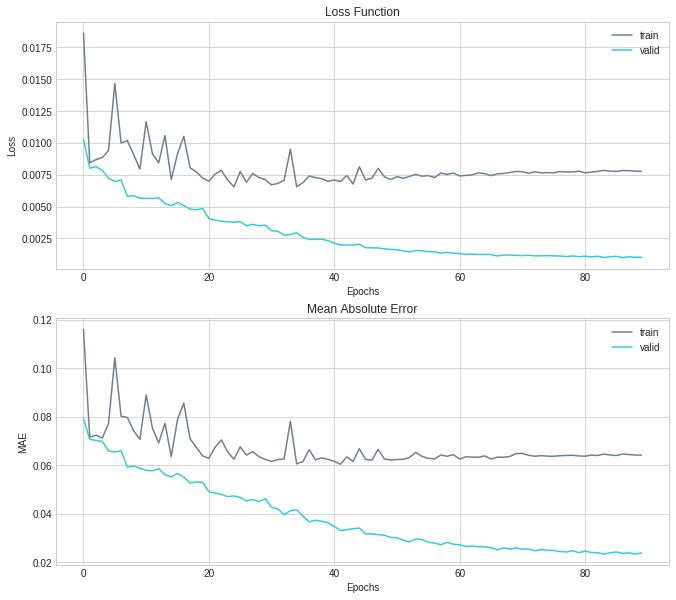

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
RNN; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9318795418803384
EV score. Valid:  0.8653387649026952
EV score. Test:  0.8661652488796611
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9317954356431529
R2 score. Valid:  0.8649174564099007
R2 score. Test:  0.8655308871629002
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.0028797026902086086
MSE score. Valid:  0.006557712889806388
MSE score. Test:  0.007013576823643317
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.040434330051129314
MAE score. Valid:  0.062402619681959065
MAE score. Test:  0.06317478694207966
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.03209529209136963
MdAE score. Valid:  0.04711444520950325
MdAE score. Test:  0.05052821981906891


In [23]:
history_plot(history,10)
rnn_model1.load_weights(fw)
y_train_rnn1=rnn_model1.predict(X_train1.reshape(-1,1,138))
y_valid_rnn1=rnn_model1.predict(X_valid1.reshape(-1,1,138))
y_test_rnn1=rnn_model1.predict(X_test1.reshape(-1,1,138))
scores('RNN; Economic Need Index',y_train1,y_valid1,y_test1,
       y_train_rnn1,y_valid_rnn1,y_test_rnn1)

### RNN => The second set of features and targets

In [24]:
def rnn_model2():
    model=Sequential()   
    model.add(LSTM(138,return_sequences=True,
                   input_shape=(1,138)))
    model.add(LSTM(138*4,return_sequences=False))     
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.1))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',
                  metrics=['mae'])     
    return model 
rnn_model2=rnn_model2()

In [25]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=rnn_model2.fit(X_train2.reshape(-1,1,138),y_train2, 
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid2.reshape(-1,1,138),y_valid2),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 2s - loss: 0.4561 - mean_absolute_error: 0.4921 - val_loss: 0.3246 - val_mean_absolute_error: 0.4488

Epoch 00001: val_loss improved from inf to 0.32463, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 1s - loss: 0.3585 - mean_absolute_error: 0.4465 - val_loss: 0.2892 - val_mean_absolute_error: 0.4096

Epoch 00002: val_loss improved from 0.32463 to 0.28916, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 1s - loss: 0.3362 - mean_absolute_error: 0.4262 - val_loss: 0.5118 - val_mean_absolute_error: 0.5600

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 1s - loss: 0.3252 - mean_absolute_error: 0.4232 - val_loss: 0.2839 - val_mean_absolute_error: 0.4056

Epoch 00004: val_loss improved from 0.28916 to 0.28387, saving model to weights.passnyc.hdf5
Epoch 5/100
 - 1s - loss: 0.2986 - mean_absolute_error: 0.4004 - val_loss: 0.2654 - val_mean_absolute_error: 0.3981

Epoch 00005: val_loss improved from 0.28387 to 0.26540,

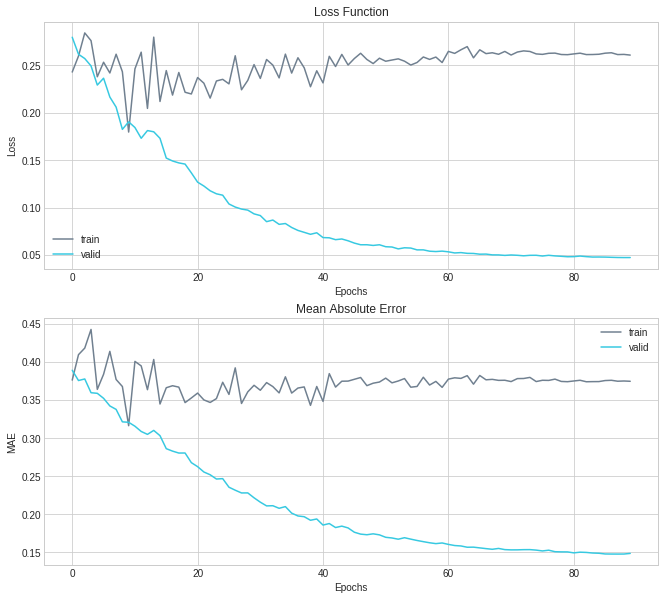

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
RNN; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.7913660882709515
EV score. Valid:  0.7272749970771626
EV score. Test:  0.6521670985256482
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.7853068587876142
R2 score. Valid:  0.7256712542469456
R2 score. Test:  0.6381543386926289
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.1554010107275633
MSE score. Valid:  0.17948865466289696
MSE score. Test:  0.4048400475953697
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.2913199766028166
MAE score. Valid:  0.31622133895619875
MAE score. Test:  0.4294483790307797
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.22272445854417927
MdAE score. Valid:  0.27399995366555324
MdAE score. Test:  0.29320143256807935


In [26]:
history_plot(history,10)
rnn_model2.load_weights(fw)
y_train_rnn2=rnn_model2.predict(X_train2.reshape(-1,1,138))
y_valid_rnn2=rnn_model2.predict(X_valid2.reshape(-1,1,138))
y_test_rnn2=rnn_model2.predict(X_test2.reshape(-1,1,138))
scores('RNN; School Income Estimate',y_train2,y_valid2,y_test2,
       y_train_rnn2,y_valid_rnn2,y_test_rnn2)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Display Predictions</h1>
### The first set of features and targets

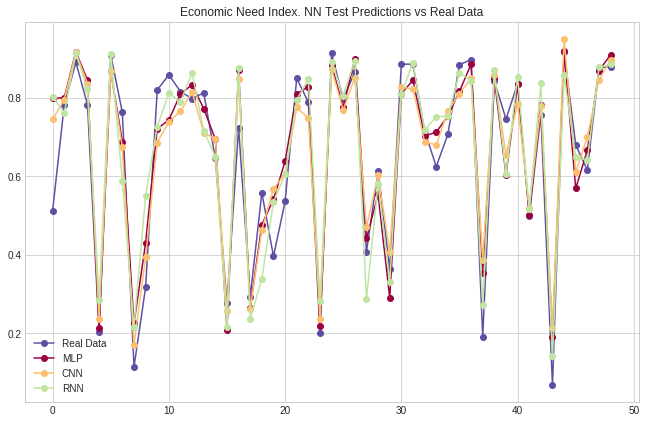

In [27]:
plt.figure(figsize=(11,7)); n=50
plt.plot(y_test1[1:n],'-o',
         color=spectral_cmap[3],label='Real Data')
plt.plot(y_test_mlp1[1:n],'-o',
         color=spectral_cmap[0],label='MLP')
plt.plot(y_test_cnn1[1:n],'-o',
         color=spectral_cmap[1],label='CNN')
plt.plot(y_test_rnn1[1:n],'-o',
         color=spectral_cmap[2],label='RNN')
ti="Economic Need Index. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

### The second set of features and targets

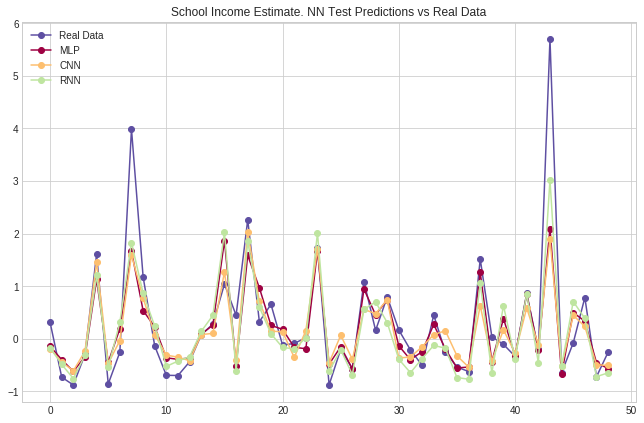

In [28]:
plt.figure(figsize=(11,7))
plt.plot(y_test2[1:n],'-o',
         color=spectral_cmap[3],label='Real Data')
plt.plot(y_test_mlp2[1:n],'-o',
         color=spectral_cmap[0],label='MLP')
plt.plot(y_test_cnn2[1:n],'-o',
         color=spectral_cmap[1],label='CNN')
plt.plot(y_test_rnn2[1:n],'-o',
         color=spectral_cmap[2],label='RNN')
ti="School Income Estimate. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp;  Let's Go Ahead</h1>

The results obtained could be a base for several generalizing assumptions:

1) Neural networks such as a multilayer perceptron (MLP) and a recurrent neural network (RNN) better than a convolutional neural network (CNN) cope with the prediction of regression in the presence of mixed data (financial, sociological, etc.)

2) Characteristics of the educational process and results, social environment, ethnic composition, administrative affiliation are sufficient to predict the level of the indicator "Economic Need Index".

3) The same variables are not enough for predicting "School Income Estimate". The information must be supplemented with indicators of economic activity in general for the state and the economic situation in the district adjacent to the school.

It' s time to move to the next step.

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2)